In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random

In [6]:
datadir = 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv((datadir + '/driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/center_2020_03_12_22_04_28_248.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/left_2020_03_12_22_04_28_248.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/right_2020_03_12_22_04_28_248.jpg,0.0,0.0,0.0,0.000078
1,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/center_2020_03_12_22_04_28_351.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/left_2020_03_12_22_04_28_351.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/right_2020_03_12_22_04_28_351.jpg,0.0,0.0,0.0,0.000080
2,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/center_2020_03_12_22_04_28_461.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/left_2020_03_12_22_04_28_461.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/right_2020_03_12_22_04_28_461.jpg,0.0,0.0,0.0,0.000078
3,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/center_2020_03_12_22_04_28_564.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/left_2020_03_12_22_04_28_564.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/right_2020_03_12_22_04_28_564.jpg,0.0,0.0,0.0,0.000078
4,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/center_2020_03_12_22_04_28_678.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/left_2020_03_12_22_04_28_678.jpg,/Users/aaronspindler/Desktop/SelfDrivingCar/behaviour-cloning/data/IMG/right_2020_03_12_22_04_28_678.jpg,0.0,0.0,0.0,0.000078


In [7]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_03_12_22_04_28_248.jpg,left_2020_03_12_22_04_28_248.jpg,right_2020_03_12_22_04_28_248.jpg,0.0,0.0,0.0,0.000078
1,center_2020_03_12_22_04_28_351.jpg,left_2020_03_12_22_04_28_351.jpg,right_2020_03_12_22_04_28_351.jpg,0.0,0.0,0.0,0.000080
2,center_2020_03_12_22_04_28_461.jpg,left_2020_03_12_22_04_28_461.jpg,right_2020_03_12_22_04_28_461.jpg,0.0,0.0,0.0,0.000078
3,center_2020_03_12_22_04_28_564.jpg,left_2020_03_12_22_04_28_564.jpg,right_2020_03_12_22_04_28_564.jpg,0.0,0.0,0.0,0.000078
4,center_2020_03_12_22_04_28_678.jpg,left_2020_03_12_22_04_28_678.jpg,right_2020_03_12_22_04_28_678.jpg,0.0,0.0,0.0,0.000078


<BarContainer object of 25 artists>

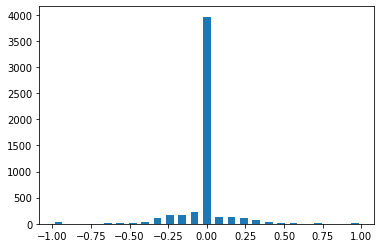

In [11]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)